# TP Semanal 4

## Consignas:
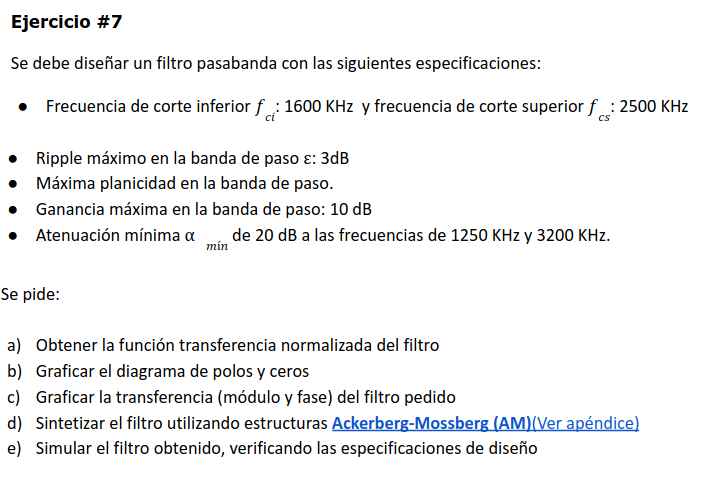

## Resolución:

In [3]:
from IPython.display import IFrame

IFrame(src='TS4b.pdf', width=700, height=600)

## Simulaciones:

### Python

A continuación se muestra cómo queda la transferencia que obtuveen los cálculos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

"""
Te grafica PZMap, Modulo y Fase
"""
def plot_tf(tf):
    #Imprimo transferencia
    print(tf.num)
    print("----------------")
    print(tf.den)
    #print("Polos: ", tf.to_zpk().poles)
    #print("Ceros: ", tf.to_zpk().zeros)
    #print("K: ", tf.to_zpk().gain)
    
    # Obtener la respuesta en frecuencia
    w, mag, phase = signal.bode(tf)

    # Graficar la respuesta en módulo
    plt.figure()
    plt.semilogx(w, mag)
    plt.xlabel('Frecuencia [rad/s]')
    plt.ylabel('Magnitud [dB]')
    plt.title('Respuesta en Módulo')
    plt.grid(True)

    # Graficar la respuesta en fase
    plt.figure()
    plt.semilogx(w, phase)
    plt.xlabel('Frecuencia [rad/s]')
    plt.ylabel('Fase [grados]')
    plt.title('Respuesta en Fase')
    plt.grid(True)

    # Obtener los polos y ceros
    poles = tf.poles
    zeros = tf.zeros

    # Configuración del gráfico
    fig, ax = plt.subplots()
    ax.set_aspect('equal')  # Proporción de ejes igual para una circunferencia circular
    ax.axhline(0, color='gray', lw=0.5)  # Eje horizontal
    ax.axvline(0, color='gray', lw=0.5)  # Eje vertical
    ax.grid(True, linestyle='--', alpha=0.5)  # Activar la grilla
    
    # Traza la circunferencia unitaria
    theta = np.linspace(0, 2 * np.pi, 100)
    x = np.cos(theta)
    y = np.sin(theta)
    ax.plot(x, y, color='gray', linewidth=0.5, linestyle='--')
    
    # Traza los polos y ceros
    ax.plot(np.real(poles), np.imag(poles), 'x')
    ax.plot(np.real(zeros), np.imag(zeros), 'o')
    
    # Etiquetas y leyenda
    ax.set_xlabel('Parte real')
    ax.set_ylabel('Parte imaginaria')
    ax.set_title('Diagrama de polos y ceros', pad=10, loc='center')
    ax.legend()
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.28815548 0.         0.         0.        ]
----------------
[1.         0.8998     3.40456802 1.89051202 3.40426915 0.89962882
 0.99975091]


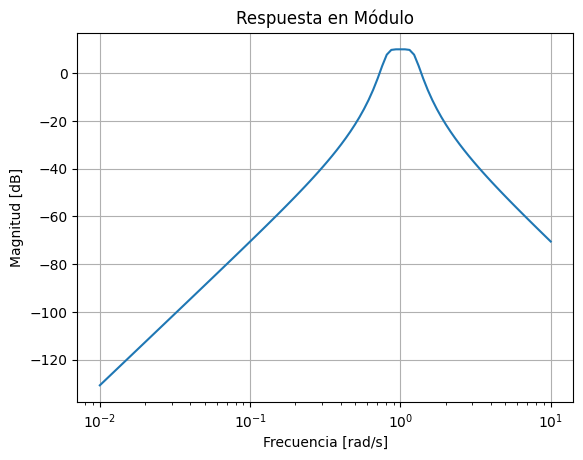

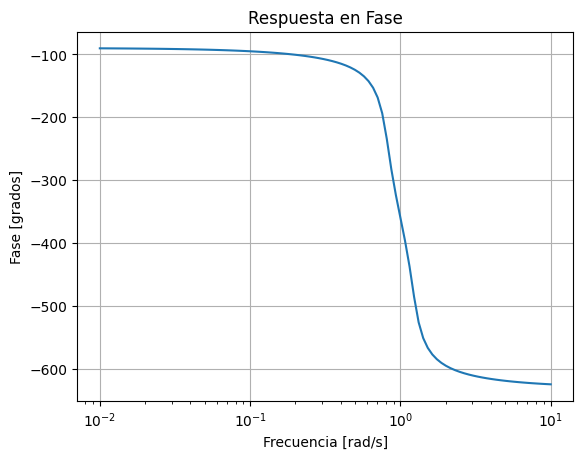

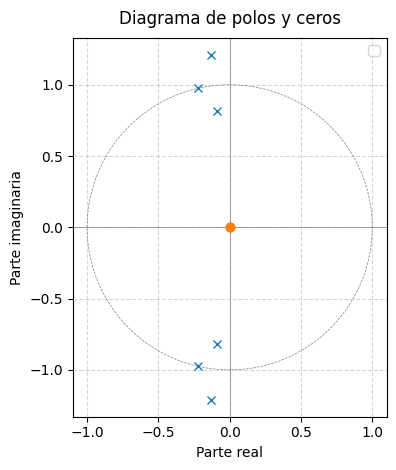

In [2]:
p1 = -0.0908 + 0.81795j 
p2 = -0.0908 - 0.81795j 
p3 = -0.1341 + 1.2076j
p4 = -0.1341 - 1.2076j
p5 = -0.225 + 0.9743j
p6 = -0.225 - 0.9743j
poles=[p1,p2,p3,p4,p5,p6]
zeros=[0,0,0]
k=0.45**3*3.1622
num, den = signal.zpk2tf(zeros,poles,k)
tf = signal.TransferFunction( num, den )
plot_tf(tf)

Se puede observar que la transferencia cumple con los -20dB respecto de la banda de paso y el riple de -3dB para las wp

### LTSpice
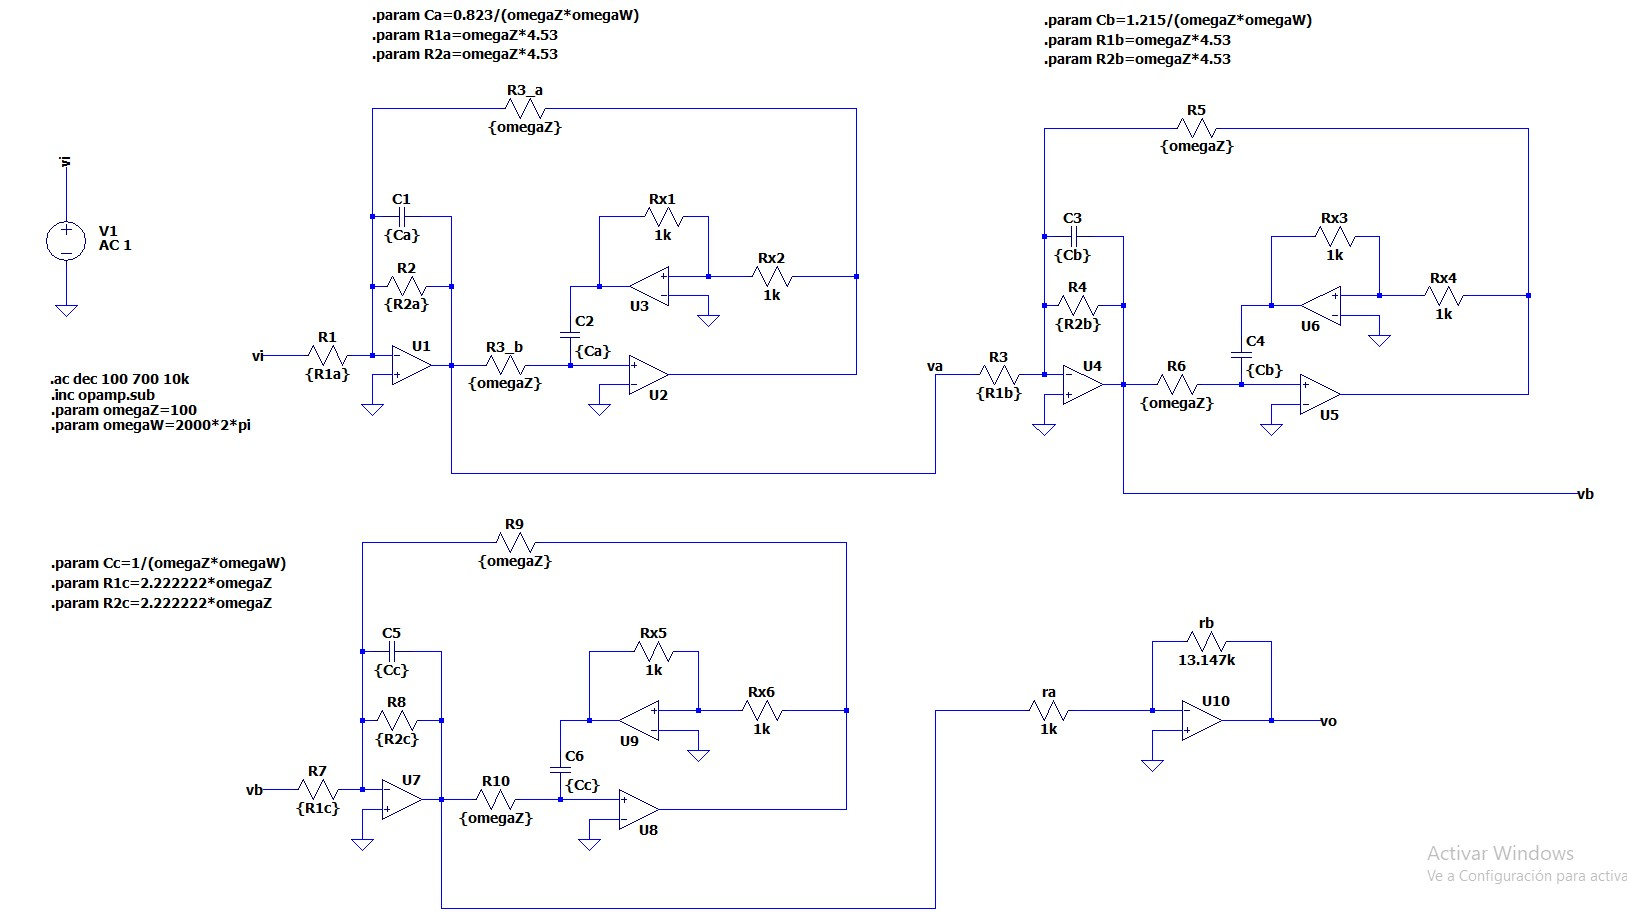
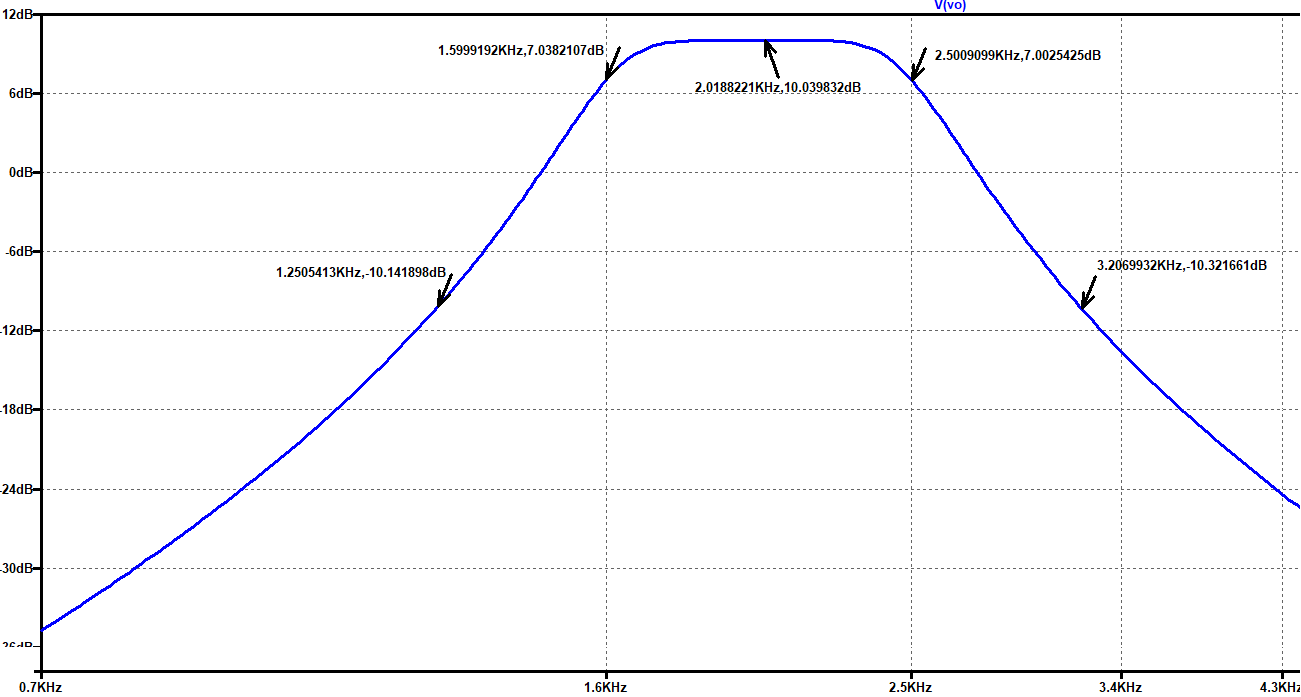

### Observaciones
Vemos que el filtro cumple con la plantilla.
Con la simulacion en sympy verificamos la transferencia.
Con esta simulación en LTSpice verificamos que el circuito propuesto y la sínteis fueron correctos.